<a href="https://colab.research.google.com/github/Maor66389/maor/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST
<div dir=rtl>


בתרגיל זה נשתמש בדאטה סט אשר נקרא Fashion MNIST אותו ניקח מספריית tensorflow.<br>
הריצו את התא הבא, אם יש לכם צורך ב-imports נוספים הוסיפו אותם.

In [37]:
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<div dir=rtl>

בתא הבא אנו מיבאים את הדאטה סט ומחלקים אותו לדאטה של אימון ודאטה של בחינה.<br>

In [4]:
#יבוא של ה dataset 
fashion_mnist = tf.keras.datasets.fashion_mnist
#חילוק לאימון ולמבחן תמונות ותיוגים
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
print(train_images.shape)


(60000, 28, 28)


In [6]:
#תשובה מספר 4
np.unique(train_labels)
#ככה רואים שיש עשרה תיוגיום בדאטה סט כל תיוג מיוצג על ידי ספרה מאחת על 10



array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
 #מערך של 28 על 28 כל פיקסל מיוצג על ידי איבר במערך כל איבר יש ערך בין 0 ל256 המייצג את הצבע של הפיקסל
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

<div dir=rtl>

### ענו על השאלות הבאות ביחס לדאטה

1. כמה דגימות אימון ישנן? כמה דגימות מבחן?
2. מה גודל כל תמונה בדאטה סט?
3. כמה לייבלז שונים ישנם ומהם?
4. מה התפלגות הלייבלז השונים? כמה תמונות יש לכל לייבל?
5. מה טווח הערכים בתמונה?


1. ישנם 60000 דגימות אימון ו10000 דגימות מבחן
2. כל התמונות בגודל של28*28*1
3. יש עשרה תיוגים שונים 

<div dir=rtl>

### הצגת תמונות לדוגמא

הציגו מספר תמונות לדוגמא מתוך הדאטה של האימון. הציגו בכותרת של כל תמונה את הלייבל שלה. <br>
מומלץ להגדיר רשימה של השמות המתאימים ללייבלז ולא להשתמש רק במספור שלהם לצורך ההצגה.

In [9]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


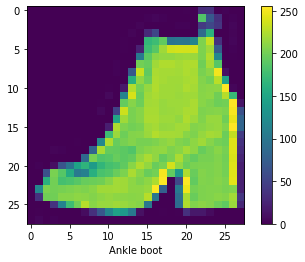

In [10]:
x=800
plt.figure
plt.imshow(train_images[x])
plt.colorbar()
plt.xlabel(class_names[train_labels[x]])
plt.show()

In [11]:
#נירמול שכל פיקסל יקבל ערך בין אפס לאחד
train_images=train_images/255
test_images=test_images/255


<div dir=rtl>

### עיבוד מקדים של הדאטה

לפני שנעביר את התמונות לרשת לצורך אימון, נרצה לבצע עיבוד מקדים. בדומה לדוגמא מהתרגול האחרון, נרצה לבצע scaling, להוסיף מימד לתמונות, ולהפוך את הלייבלז לקטגוריאלים.

<div dir=rtl>

### הגדרת המודל

בתא הבא הגדירו את המודל שלכם. המודל יהיה מסוג sequential וצריך לכלול מספר שכבות לבחירתכם.<br>
שימו לב להגדיר למודל את גודל הקלט אותו הוא יקבל.<br>
השתמשו ב-summary על מנת לראות תדפיס של המודל ולוודא את הגדלים ומספר הפרממטרים.<br>
לאחר מכן קמפלו את המודל שלכם. זכרו להגדיר ל-compile מה פונקציית המחיר, מה שיטת האופטימיזציה ומהן מטריקות ההערכה שאתם מעוניינים בהן.

In [49]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)),
  layers.Dense(128, activation="relu"),
  layers.Dense(10,activation="softmax")
])


<div dir=rtl>


### אימון המודל

בצעו אימון למודל שלכם בתא הבא. הגדירו אחוז מסויים מהדאטה שישמש לולידציה.<br>
שימו לב לתוצאות שמתקבלות, האם אתם ב-overfitting?<br>
מתודת ה-fit מחזירה אובייקט history אשר שומר את תוצאות ה-accuracy וה-loss לאורך האימון. שמרו את התוצאות על מנת להציגן בהמשך.

<div dir=rtl>

### הצגת ה-Loss\Acuraccy

צרו גרף אשר מציג את עקומת ההפסד ו/או הדיוק של המודל.<br>
נסו לבצע אופטימיזציה של הפרמטרים שבחרתם על סמך העקומה המתקבלת.

<div dir=rtl>

### בחינת ביצועי המודל

בצעו בדיקה של ביצועי המודל על סט המבחן. האם התוצאות רחוקות ממה שקיבלתם על סט הוולידציה?